# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd

# Data Collection and Data Processing

In [79]:
df = pd.read_csv('C:/Users/fr2005tu/Downloads/train_0irEZ2H.csv')

In [81]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [83]:
df[['day','month','year']]= df['week'].str.split('/', expand=True)

In [85]:
df = df.drop('week',axis=1)

# Training and Test Data

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X,y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Model Training --> Random Forest Regressor

In [89]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

model.score(X_test, y_test)

# Model Evaluation


In [93]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

26.982208019552246

In [95]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

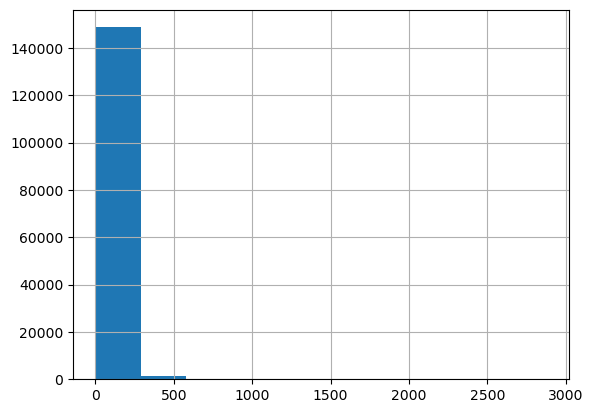

In [97]:
df.units_sold.hist()

# Model Visualition

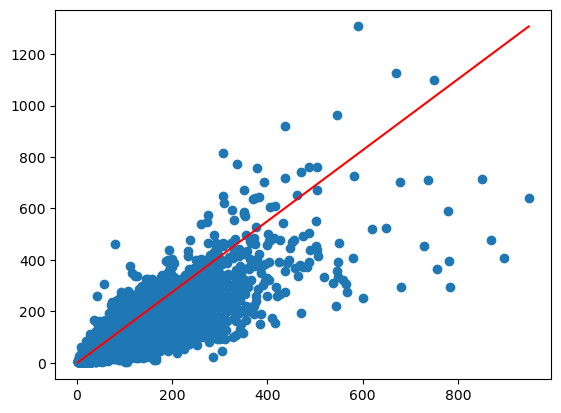

In [99]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color="red")

array([[<Axes: title={'center': 'record_ID'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'sku_id'}>],
       [<Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'is_featured_sku'}>],
       [<Axes: title={'center': 'is_display_sku'}>,
        <Axes: title={'center': 'units_sold'}>, <Axes: >]], dtype=object)

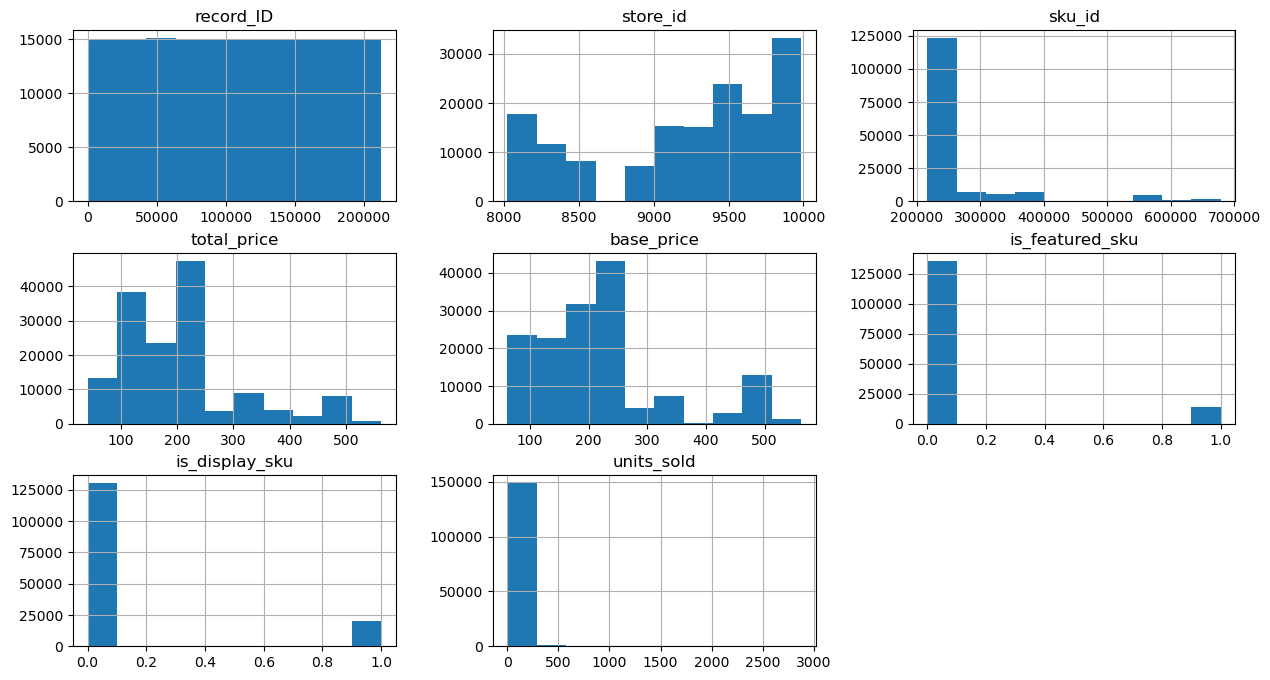

In [101]:
df.hist(figsize=(15,8))

In [103]:
df= df.drop('record_ID',axis=1)

In [105]:
len(df.store_id.unique())

76

In [107]:
len(df.sku_id.unique())

28

In [109]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]


<Axes: >

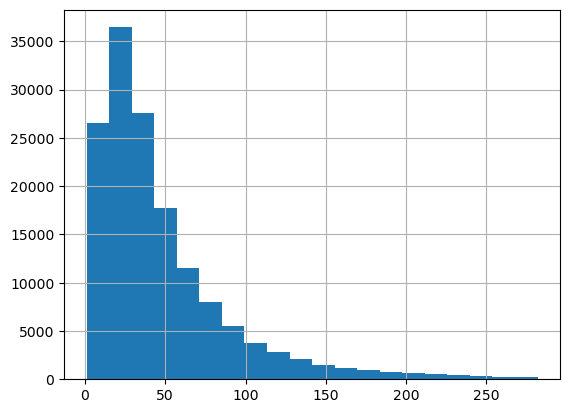

In [111]:
df.units_sold.hist(bins=20)

In [113]:
df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id',axis=1)
df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id',axis=1)

,store_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,item_216233,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,8091,99.0375,111.8625,0,0,20,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,8091,99.0375,99.0375,0,0,28,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,8091,133.9500,133.9500,0,0,19,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,8091,133.9500,133.9500,0,0,44,17,01,11,True,...,False,False,False,False,False,False,False,False,False,False
4,8091,141.0750,141.0750,0,0,52,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,235.8375,235.8375,0,0,38,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150146,9984,235.8375,235.8375,0,0,30,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150147,9984,357.6750,483.7875,1,1,31,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150148,9984,141.7875,191.6625,0,1,12,09,07,13,False,...,False,False,False,False,False,False,True,False,False,False


In [119]:
model = RandomForestRegressor(n_jobs=-1)

X,y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [121]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [123]:
model.score(X_test, y_test)

0.8086148853357921

In [127]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

18.67422898269402

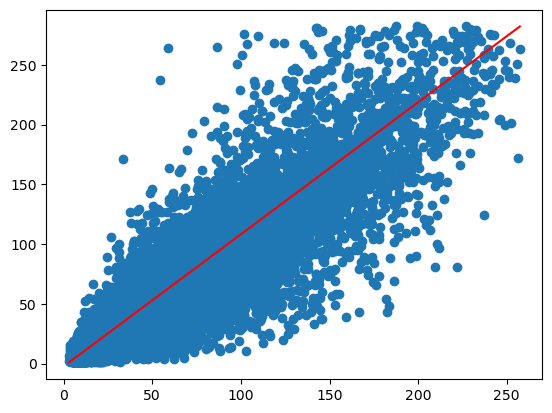

In [129]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color="red")

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'n_estimators': [10,20],
    'min_samples_split': [2,3]    
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   1.2s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   1.2s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   1.2s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.7s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   1.2s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   1.3s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [144]:
best_model = grid_search.best_estimator_

In [145]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [146]:
best_model.score(X_test,y_test)

0.7969700437092289